In [26]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
palette = ['#56903A','#C56C39','#BAE5F9','#6F4930','#213A1B']
sns.set_palette(palette)

In [57]:
data =pd.read_csv('allnpdata.csv')
data.shape

/var/folders/r0/2fgtj8y934zddv46dgfbq1xw0000gn/T/ipykernel_68053/3019946645.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data =pd.read_csv('allnpdata.csv')


(93328, 35)

In [36]:
data.sample(5)

,ParkName,UnitCode,ParkType,Region,State,Year,Month,RecreationVisits,NonRecreationVisits,RecreationHours,...,NonRecreationVisitsTotal,RecreationHoursTotal,NonRecreationHoursTotal,ConcessionerLodgingTotal,ConcessionerCampingTotal,TentCampersTotal,RVCampersTotal,BackcountryTotal,NonRecreationOvernightStaysTotal,MiscellaneousOvernightStaysTotal
76790,San Antonio Missions NHP,SAAN,National Historical Park,Intermountain,TX,2008,8,88498,0,150862,...,0,2078836,0,0,0,0,0,0,0,0
32611,Frederick Douglass NHS,FRDO,National Historic Site,National Capital,DC,2019,1,89,0,89,...,0,61063,0,0,0,0,0,0,0,0
26622,Ford's Theatre NHS,FOTH,National Historic Site,National Capital,DC,2023,12,37709,1785,72627,...,7895,541474,23685,0,0,0,0,0,0,0
21495,Death Valley NP,DEVA,National Park,Pacific West,CA,2014,9,110593,3847,611969,...,40655,7698952,60983,30730,12271,53868,67415,0,0,490
72727,Richmond NBP,RICH,National Battlefield Park,Northeast,VA,2017,1,12333,12644,20631,...,150286,425755,37572,0,0,0,0,0,0,0


In [46]:
num_attribs =['RecreationVisits', 'NonRecreationVisits', 'RecreationHours',
       'NonRecreationHours', 'ConcessionerLodging', 'ConcessionerCamping',
       'TentCampers', 'RVCampers', 'Backcountry',
       'NonRecreationOvernightStays', 'MiscellaneousOvernightStays', 'RecreationVisitsTotal',
       'NonRecreationVisitsTotal', 'RecreationHoursTotal',
       'NonRecreationHoursTotal', 'ConcessionerLodgingTotal',
       'ConcessionerCampingTotal', 'TentCampersTotal', 'RVCampersTotal',
       'BackcountryTotal', 'NonRecreationOvernightStaysTotal',
       'MiscellaneousOvernightStaysTotal']

for x in num_attribs:
    data[x]=data[x].apply(lambda x: str(x).replace(',',''))
    data[x]=pd.to_numeric(data[x])

In [34]:
data.describe()

,Year,Month,RecreationVisits,NonRecreationVisits,RecreationHours,NonRecreationHours,ConcessionerLodging,ConcessionerCamping,TentCampers,RVCampers,...,NonRecreationVisitsTotal,RecreationHoursTotal,NonRecreationHoursTotal,ConcessionerLodgingTotal,ConcessionerCampingTotal,TentCampersTotal,RVCampersTotal,BackcountryTotal,NonRecreationOvernightStaysTotal,MiscellaneousOvernightStaysTotal
count,93328.00000,93328.000000,9.332800e+04,9.332800e+04,9.332800e+04,9.332800e+04,93328.000000,93328.000000,93328.000000,93328.000000,...,9.332800e+04,9.332800e+04,9.332800e+04,93328.000000,93328.000000,93328.000000,93328.000000,93328.000000,93328.000000,9.332800e+04
mean,2013.19140,6.500729,6.558803e+04,3.621221e+04,2.875552e+05,3.621221e+04,712.393890,284.449597,720.023444,504.736703,...,4.345464e+05,3.450452e+06,2.312822e+05,8548.726684,3413.395165,8640.281330,6056.840434,4925.346970,448.387290,5.137150e+03
std,6.06195,3.452042,1.590302e+05,2.327000e+05,1.085375e+06,2.327000e+05,6208.278145,4441.492831,4016.231632,2402.352325,...,2.777377e+06,1.061505e+07,1.447876e+06,59514.737365,32097.706676,33239.090335,21260.847842,21982.995406,8465.579506,5.201559e+04
min,2003.00000,1.000000,-4.250000e+02,-3.296400e+04,-4.780000e+02,-3.296400e+04,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2008.00000,4.000000,2.543000e+03,0.000000e+00,3.958000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,7.371675e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,2013.00000,7.000000,1.155500e+04,0.000000e+00,2.109050e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,3.685090e+05,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,2018.00000,10.000000,5.235600e+04,4.690000e+02,1.294845e+05,4.690000e+02,0.000000,0.000000,0.000000,0.000000,...,6.621000e+03,1.948855e+06,5.796000e+03,0.000000,0.000000,0.000000,0.000000,175.000000,0.000000,0.000000e+00
max,2023.00000,12.000000,2.581882e+06,4.736394e+06,2.021239e+07,4.736394e+06,151190.000000,171555.000000,145536.000000,78060.000000,...,3.796659e+07,1.171402e+08,2.323001e+07,938418.000000,616089.000000,588701.000000,376744.000000,337790.000000,292808.000000,1.398724e+06


In [64]:
data[data['RecreationVisits']=='0']['ParkName'].unique()

array(['Adams NHP', 'African Burial Ground NM', 'Agate Fossil Beds NM',
       'Alagnak Wild River', 'Alibates Flint Quarries NM',
       'Allegheny Portage Railroad NHS', 'Aniakchak NM & PRES',
       'Apostle Islands NL', 'Arches NP',
       'Arlington House The R.E. Lee MEM',
       "Belmont-Paul Women's Equality NM", "Bent's Old Fort NHS",
       'Big Bend NP', 'Bluestone NSR', 'Booker T. Washington NM',
       'Boston Harbor Islands NRA', 'Boston NHP',
       'Brown v. Board of Education NHP', 'Buffalo NR', 'Cabrillo NM',
       'Camp Nelson NM', 'Cane River Creole NHP', 'Canyon de Chelly NM',
       'Canyonlands NP', 'Cape Krusenstern NM', 'Capulin Volcano NM',
       'Carl Sandburg Home NHS', 'Carter G. Woodson Home NHS',
       'Casa Grande Ruins NM', 'Castle Clinton NM', 'Cesar E. Chavez NM',
       'Chamizal NMEM', 'Charles Pinckney NHS',
       'Charles Young Buffalo Soldiers NM', 'Christiansted NHS',
       'Clara Barton NHS', 'Congaree NP', 'Crater Lake NP',
       'Cumber

In [42]:
# to turn into date time, let's just use the first of the month
data['day'] = 1

In [45]:
data['date']=pd.to_datetime(data[['Year','Month','day']])
data.head()

,ParkName,UnitCode,ParkType,Region,State,Year,Month,RecreationVisits,NonRecreationVisits,RecreationHours,...,NonRecreationHoursTotal,ConcessionerLodgingTotal,ConcessionerCampingTotal,TentCampersTotal,RVCampersTotal,BackcountryTotal,NonRecreationOvernightStaysTotal,MiscellaneousOvernightStaysTotal,day,date
0,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2003,1,5537,0,5537,...,0,0,0,0,0,0,0,0,1,2003-01-01
1,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2003,2,6064,0,6064,...,0,0,0,0,0,0,0,0,1,2003-02-01
2,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2003,3,12005,0,12005,...,0,0,0,0,0,0,0,0,1,2003-03-01
3,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2003,4,20202,0,20202,...,0,0,0,0,0,0,0,0,1,2003-04-01
4,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2003,5,23537,0,23537,...,0,0,0,0,0,0,0,0,1,2003-05-01


In [54]:
data[data['State'].isnull()]['ParkName'].unique()

array(['Alagnak Wild River', "Belmont-Paul Women's Equality NM",
       'Boston Harbor Islands NRA', 'Camp Nelson NM',
       'Carter G. Woodson Home NHS', 'Cesar E. Chavez NM',
       'Charles Young Buffalo Soldiers NM', 'Dwight D. Eisenhower MEM',
       'First State NHP', 'Harriet Tubman Underground Railroad NHP',
       'Katahdin Woods and Waters NM', 'Keweenaw NHP',
       'Manhattan Project NHP', 'Medgar and Myrlie Evers Home NM',
       'Mill Springs Battlefield NM', 'Minidoka NHS',
       'Paterson Great Falls NHP', 'Pullman NHP',
       'Reconstruction Era NHP', 'Rosie The Riveter WWII Home Front NHP',
       'Stonewall NM', 'Tule Lake NM', 'Tule Springs Fossil Beds NM',
       'Valles Caldera NPRES', 'Waco Mammoth NM', 'World War I MEM'],
      dtype=object)

In [89]:
#NPS data is depressingly shitty
custom_mapping = {'Alagnak Wild River': 'AK', "Belmont-Paul Women's Equality NM": 'DC', 
                  'Boston Harbor Islands NRA':'MA', 'Camp Nelson NM': 'KY', 'Carter G. Woodson Home NHS':'DC',
                  'Cesar E. Chavez NM': 'CA', 'Charles Young Buffalo Soldiers NM':'OH',
                  'Dwight D. Eisenhower MEM':'DC', 'First State NHP':'DE','Harriet Tubman Underground Railroad NHP':"MD",
                  'Katahdin Woods and Waters NM':'ME','Keweenaw NHP':'MI','Manhattan Project NHP':'NM','Medgar and Myrlie Evers Home NM':'MO',
                  'Mill Springs Battlefield NM':'KY','Minidoka NHS':'ID','Paterson Great Falls NHP':'NJ','Pullman NHP':'IL', 'Reconstruction Era NHP':'SC',
                  'Rosie The Riveter WWII Home Front NHP':'CA','Stonewall NM':'NY','Tule Lake NM':'CA','Tule Springs Fossil Beds NM':'NV',
                  'Valles Caldera NPRES':'NM','Waco Mammoth NM':'TX','World War I MEM':'DC'
                  }

In [92]:
def get_new_state(x:pd.Series):
    '''Where pd.Series is a row'''
    if type(x['State']) is float:
        output = custom_mapping[x['ParkName']]
    else:
        output = x['State']
    return output

data['state_2'] = data.apply(lambda x: get_new_state(x),axis=1)

In [119]:
data['state_2'].describe()

count     93328
unique       55
top          CA
freq       6239
Name: state_2, dtype: object

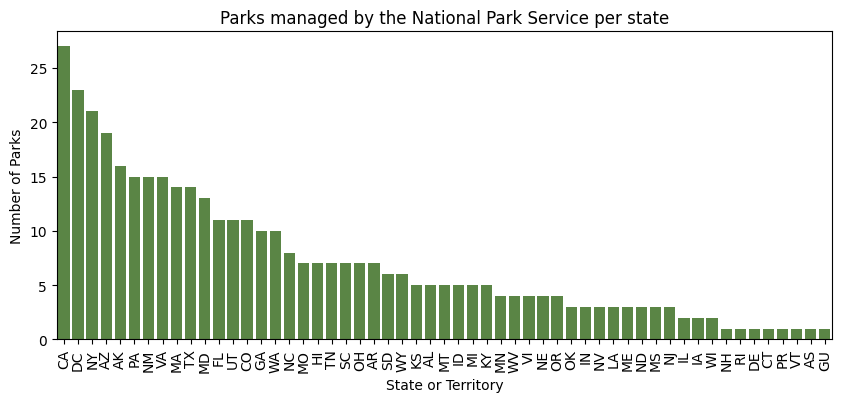

In [118]:
unique_parks = data.groupby('state_2')['ParkName'].nunique().reset_index().sort_values('ParkName',ascending=False)

fig = sns.barplot(data=unique_parks,x='state_2',y='ParkName')
plt.xticks(rotation=90)
plt.ylabel('Number of Parks')
plt.xlabel('State or Territory')
plt.rcParams["figure.figsize"] = (10,4)
_=plt.title('Parks managed by the National Park Service per state')

In [50]:
data['ParkName'].nunique()

395

In [56]:
data['ParkType'].unique()

array(['National Historical Park', 'National Park', 'National Monument',
       'National Wild & Scenic River', 'National Historic Site',
       'National Recreation Area', 'National Battlefield',
       'National Lakeshore', 'National Memorial', 'National Seashore',
       'National Preserve', 'National River', 'National Parkway',
       'Park (Other)', 'National Military Park', 'National Reserve',
       'National Battlefield Park', 'International Historic Site'],
      dtype=object)